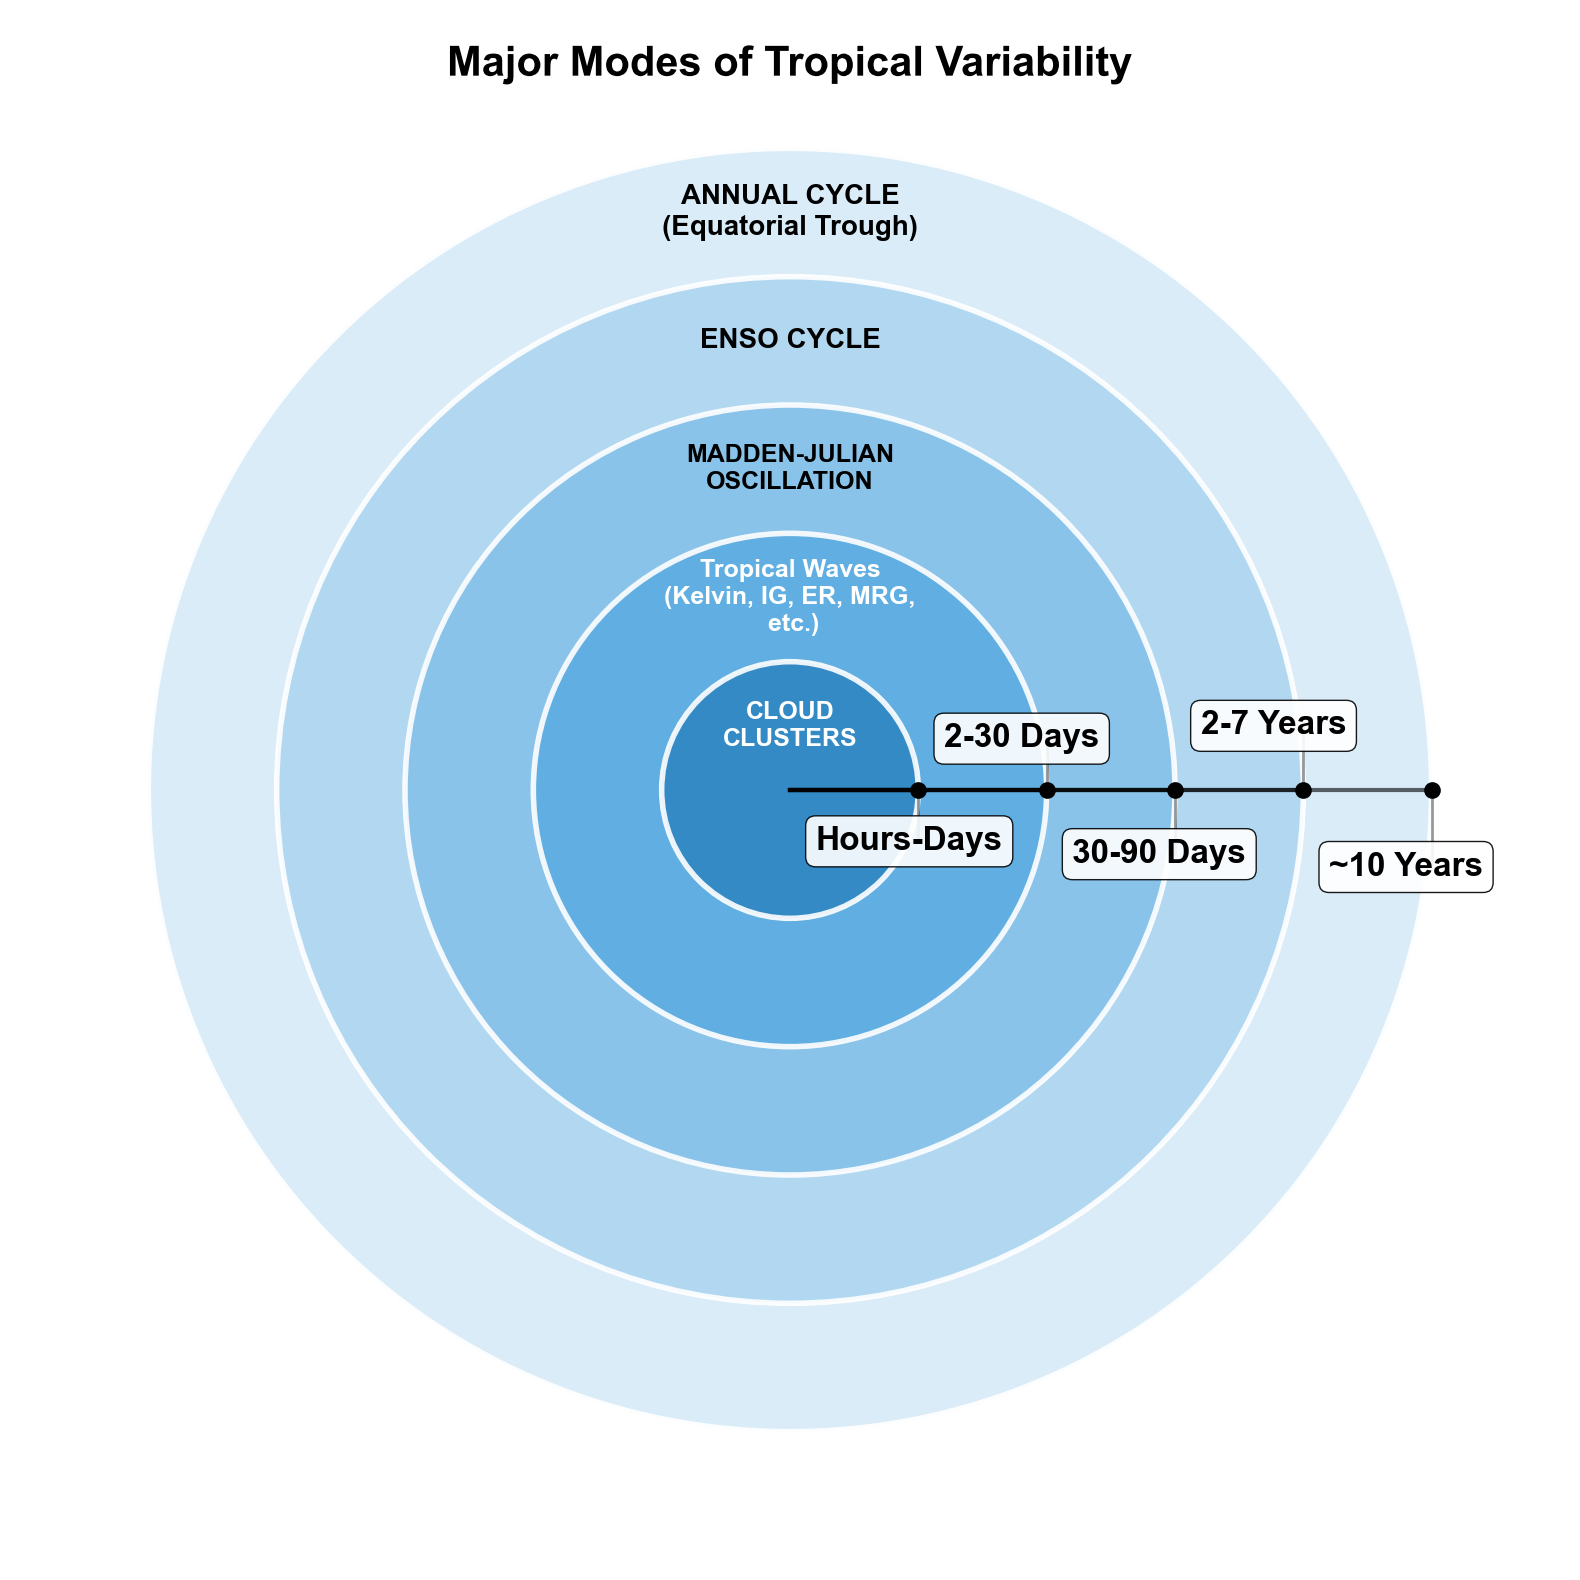

In [53]:
"""
author: xianpuji
email:  xianpuji@hhu.edu.cn
This script visualizes various atmospheric phenomena across different time scales.
time : 06.11.2025
"""

import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import matplotlib.patheffects as path_effects

# 创建画布
fig, ax = plt.subplots(figsize=(8, 8),dpi=200)
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_aspect('equal')
ax.axis('off')

# 定义各层属性（半径, 颜色, 标签）- 使用蓝色渐变方案，每层宽度一致
# 从内到外：云团(小时-天) -> 热带波动(2-30天) -> MJO(30-90天) -> ENSO(2-7年) -> 年循环(10年)
layers = [
    (5.0, "#d6eaf8", "ANNUAL CYCLE\n(Equatorial Trough)"),      # 浅蓝 - 10年尺度
    (4.0, "#aed6f1", "ENSO CYCLE"),                             # 中浅蓝 - 2-7年
    (3.0, "#85c1e9", "MADDEN-JULIAN\nOSCILLATION"),           # 中蓝 - 30-90天
    (2.0, "#5dade2", "Tropical Waves\n(Kelvin, Rossby, ER, MRG, TD-type, etc.)"),  # 深蓝 - 2-30天
    (1.0, "#2e86c1", "CLOUD\nCLUSTERS")                         # 最深蓝 - 小时-天
]

# 绘制同心圆层
for radius, color, label in layers:
    circle = Circle((0, 0), radius, color=color, ec='white', lw=2, alpha=0.9)
    ax.add_patch(circle)

# 添加标签（放在每个圆环区域内）
# ANNUAL CYCLE: 在最外层圆环（5.0和4.0之间）
ax.text(0, 4.5, "ANNUAL CYCLE\n(Equatorial Trough)", 
        color='black', fontsize=10, ha='center', va='center', fontweight='bold')

# ENSO CYCLE: 在第二层圆环（4.0和3.0之间）
ax.text(0, 3.5, "ENSO CYCLE", 
        color='black', fontsize=10, ha='center', va='center', fontweight='bold')

# MADDEN-JULIAN OSCILLATION: 在第三层圆环（3.0和2.0之间）
ax.text(0, 2.5, "MADDEN-JULIAN\nOSCILLATION", 
        color='black', fontsize=9, ha='center', va='center', fontweight='bold')

# Tropical Waves: 在第四层圆环（2.0和1.0之间）
ax.text(0, 1.5, "Tropical Waves\n(Kelvin, IG, ER, MRG,\n etc.)", 
        color='white', fontsize=9, ha='center', va='center', fontweight='bold')

# CLOUD CLUSTERS: 在最内层圆（1.0以内）
ax.text(0, 0.5, "CLOUD\nCLUSTERS", 
        color='white', fontsize=9, ha='center', va='center', fontweight='bold')

# 绘制从圆心向外的半径线和时间尺度标注（放在右侧，错落排列）
time_radii = [1.0, 2.0, 3.0, 4.0, 5.0]  # 对应各层的边界半径
time_labels = ["Hours-Days", "2-30 Days", "30-90 Days", "2-7 Years", "~10 Years"]
# 标签的垂直位置错落排列
label_y_offsets = [-0.4, +0.4, -0.5, +0.5, -0.6]

# 在右侧绘制半径线（从圆心向右，标签错落）
for i, (radius, label, y_offset) in enumerate(zip(time_radii, time_labels, label_y_offsets)):
    # 绘制从圆心到该半径的线
    ax.plot([0, radius], [0, 0], 'k-', lw=1.5, alpha=0.6)
    # 在线的末端画一个小圆点
    ax.plot(radius, 0, 'ko', markersize=5)
    
    # 绘制从端点到标签的连接线
    ax.plot([radius, radius], [0, y_offset], 'k-', lw=1, alpha=0.4)
    
    # 在错落的位置添加标签
    ax.text(radius - 0.8, y_offset, label, ha='left', va='center', 
            fontsize=12, color='black', fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor='black', 
                     linewidth=0.5, alpha=0.9))

# 添加"Time Scale"标签
title = ax.text(0, 5.5, "Major Modes of Tropical Variability",
                ha="center", va="bottom", fontsize=15, fontweight="bold", color="black")
title.set_path_effects([path_effects.withStroke(linewidth=3, foreground="white")])
plt.tight_layout()
plt.show()

fig.savefig("./fig/Tropical_Variability_Time_Scales.png", dpi=300)  # 保存为高分辨率PNG图片